In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import zipfile
import os

# Path to the folder where you uploaded the zip files
drive_folder_path = '/content/drive/MyDrive/ML_Project'

# Unzip training data
with zipfile.ZipFile(os.path.join(drive_folder_path, 'Training.zip'), 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/train/')

# Unzip validation data
with zipfile.ZipFile(os.path.join(drive_folder_path, 'Museum_Validation.zip'), 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/validation/')

# Check extracted files
print("Training Data:", os.listdir('/content/dataset/train/'))
print("Validation Data:", os.listdir('/content/dataset/validation/'))


Training Data: ['Training', '__MACOSX']
Validation Data: ['Museum_Validation', '__MACOSX']


In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize
])

# Load dataset using ImageFolder
train_dataset = datasets.ImageFolder(root='/content/dataset/train/', transform=transform)
validation_dataset = datasets.ImageFolder(root='/content/dataset/validation/', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

# Check dataset size
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(validation_dataset)}")

# Check class names
print("Classes:", train_dataset.classes)


Training samples: 20000
Validation samples: 400
Classes: ['Training', '__MACOSX']


In [12]:
import os

# Function to delete unwanted files in the dataset directory
def clean_dataset_directory(directory):
    for dirpath, _, filenames in os.walk(directory):
        for filename in filenames:
            # Remove files that start with "._" or are .DS_Store (macOS specific)
            if filename.startswith('._') or filename == '.DS_Store':
                file_path = os.path.join(dirpath, filename)
                os.remove(file_path)
                print(f"Removed {file_path}")

# Clean the train and validation directories
train_dir = '/content/dataset/train/'
validation_dir = '/content/dataset/validation/'

clean_dataset_directory(train_dir)
clean_dataset_directory(validation_dir)

# Check the directory again to make sure unwanted files are removed
print("Cleaned Training Directory:", os.listdir(train_dir))
print("Cleaned Validation Directory:", os.listdir(validation_dir))


Streaming output truncated to the last 5000 lines.
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00003709.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00000775.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00001796.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00004414.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00003494.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00003930.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00003205.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00001236.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00004211.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00002517.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00001453.jpg
Removed /content/dataset/train/__MACOSX/Training/museum-outdoor/._00000128.jpg
R

In [14]:
import shutil

# Function to clean out __MACOSX directories
def clean_mac_folders(directory):
    for dirpath, dirnames, filenames in os.walk(directory):
        if '__MACOSX' in dirnames:
            macosx_dir = os.path.join(dirpath, '__MACOSX')
            shutil.rmtree(macosx_dir)  # Remove the __MACOSX folder
            print(f"Removed {macosx_dir}")

# Clean the train and validation directories
train_dir = '/content/dataset/train/'
validation_dir = '/content/dataset/validation/'

clean_mac_folders(train_dir)
clean_mac_folders(validation_dir)

# Check if __MACOSX folder is removed
print("Cleaned Training Directory:", os.listdir(train_dir))
print("Cleaned Validation Directory:", os.listdir(validation_dir))


Removed /content/dataset/train/__MACOSX
Removed /content/dataset/validation/__MACOSX
Cleaned Training Directory: ['Training']
Cleaned Validation Directory: ['Museum_Validation']


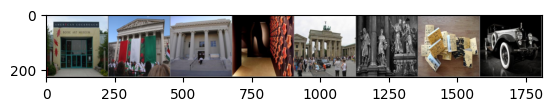

In [15]:
# Re-initialize the DataLoader after cleaning
train_dataset = datasets.ImageFolder(root='/content/dataset/train/', transform=transform)
validation_dataset = datasets.ImageFolder(root='/content/dataset/validation/', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

# Visualize some images again
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(make_grid(images[:8]))  # Display the first 8 images in the batch


In [16]:
print("EDA")

EDA


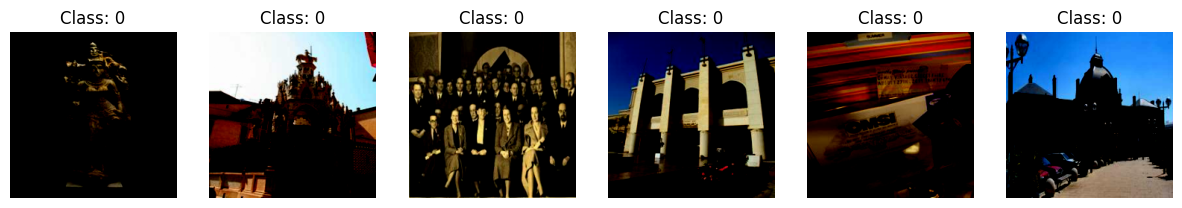

In [17]:
import matplotlib.pyplot as plt

# Function to show images in a grid
def show_images(loader, num_images=6):
    images, labels = next(iter(loader))  # Get one batch
    fig, axes = plt.subplots(1, num_images, figsize=(15, 10))

    for i in range(num_images):
        axes[i].imshow(images[i].permute(1, 2, 0))  # Convert from CxHxW to HxWxC
        axes[i].set_title(f"Class: {labels[i].item()}")
        axes[i].axis('off')

    plt.show()

# Show some sample images from the training set
show_images(train_loader)


In [18]:
from collections import Counter

# Get class distribution in the dataset
class_names = train_dataset.classes
class_counts = Counter(train_dataset.targets)

# Print the distribution of images per class
for class_idx, count in class_counts.items():
    print(f"Class: {class_names[class_idx]}, Count: {count}")


Class: Training, Count: 10000


In [19]:
# Get properties of a sample image (e.g., size, number of channels)
sample_image, _ = train_dataset[0]  # Take the first image from the dataset

# Print properties: size and number of channels
print(f"Image size: {sample_image.size()}")  # (C, H, W) format
print(f"Number of channels: {sample_image.shape[0]}")


Image size: torch.Size([3, 224, 224])
Number of channels: 3


In [20]:
print("image preprocessing")

image preprocessing


In [21]:
from torchvision import transforms

# Define image preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),          # Resize images to a consistent size
    transforms.ToTensor(),                  # Convert images to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize images
    transforms.RandomHorizontalFlip(),      # Data augmentation: Random horizontal flip
    transforms.RandomRotation(20)           # Data augmentation: Random rotation
])

# Apply the transformations to the datasets
train_dataset = datasets.ImageFolder(root='/content/dataset/train/', transform=transform)
validation_dataset = datasets.ImageFolder(root='/content/dataset/validation/', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Function to flatten the image tensors for Decision Tree input
def flatten_images(images):
    return images.view(images.size(0), -1).numpy()  # Flatten each image

# Get a batch of training data (flattened)
dataiter = iter(train_loader)
images, labels = next(dataiter)
X_train = flatten_images(images)
y_train = labels.numpy()

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=10)  # You can tune the hyperparameters here
clf.fit(X_train, y_train)

# Evaluate the model on the same batch (for example purposes, usually use a validation set)
y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 1.0000


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Evaluate accuracy
y_pred_rf = rf_clf.predict(X_train)
accuracy_rf = accuracy_score(y_train, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Random Forest Accuracy: 1.0000
